Subest PUCK plots

In [1]:
#Read
import pandas as pd

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
df = df.iloc[:, 4:]
# Remover todos os números da coluna
df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

In [2]:
# Separar a sigla dos açúcares
df['comp_id'] = df['sugar'].str.split('_').str[1]

# Merge com iupac_names
iupac_names_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt', sep=';', header=None, names=['comp_id', 'iupac_name'])
df = pd.merge(df, iupac_names_df, on='comp_id', how='left')

#Junta alfa e beta
df['iupac_name'] = df['iupac_name'].str.replace(r'^(a-|b-)', '', regex=True)
piranose_df = df

In [3]:
#Only select manose

piranose_df = df[df['sugar'].str.contains('MAN|BMA', na=False)]

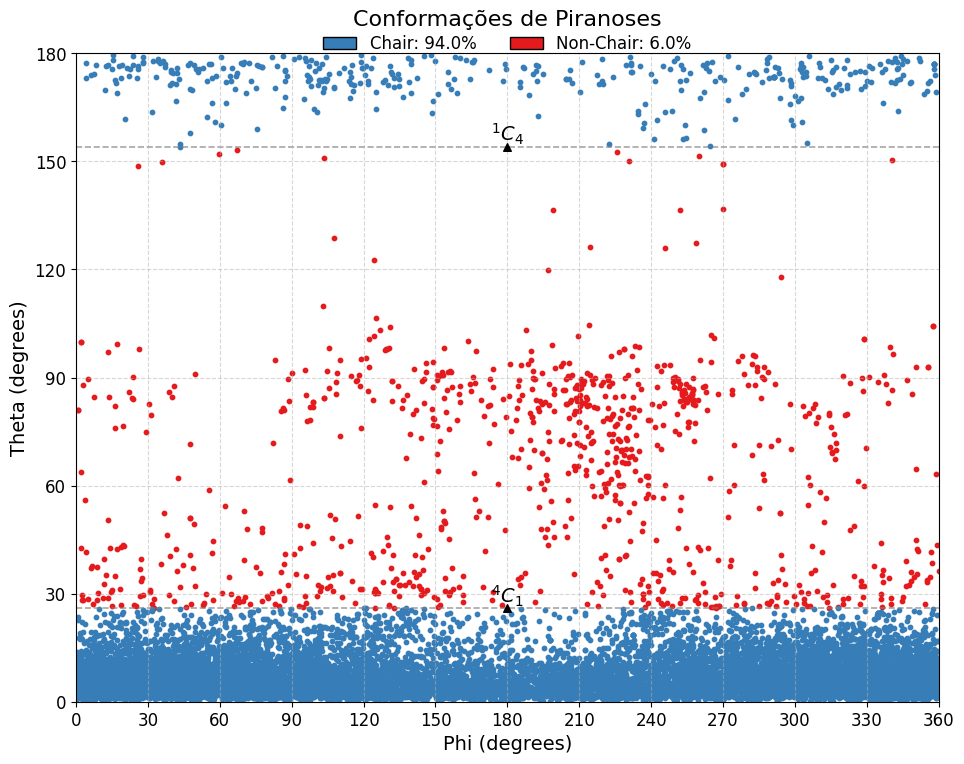

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Converter as colunas 'puck.theta_graus' e 'puck.phi_graus' para numéricas
piranose_df['puck.theta_graus'] = pd.to_numeric(piranose_df['puck.theta_graus'], errors='coerce')
piranose_df['puck.phi_graus'] = pd.to_numeric(piranose_df['puck.phi_graus'], errors='coerce')

# Verificar se piranose_df está carregado
try:
    piranose_df
except NameError:
    raise NameError("O DataFrame 'piranose_df' não foi definido. Por favor, carregue-o antes de executar o código.")

# Coordenadas e labels
coordinates = [
    (180, 26, r"$^{4}C_{1}$"),
    (180, 154, r"$^{1}C_{4}$")
]

# Cores para os pontos
default_color = '#377eb8'  # Azul (Chair)
highlight_color = '#e41a1c'  # Vermelho (Non-Chair)

# Criar uma figura única
fig, ax = plt.subplots(figsize=(10, 8))

# Filtrar os dados do DataFrame
highlight_condition = (piranose_df['puck.theta_graus'] > 26) & (piranose_df['puck.theta_graus'] < 154)

# Pontos destacados (Non-Chair)
ax.scatter(
    piranose_df.loc[highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[highlight_condition, 'puck.theta_graus'], 
    color=highlight_color,  # Vermelho
    s=10,  # Tamanho dos pontos (aumentado para melhor visualização)
    label='Non-Chair'
)

# Pontos padrão (Chair)
ax.scatter(
    piranose_df.loc[~highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[~highlight_condition, 'puck.theta_graus'], 
    color=default_color,  # Azul
    s=10,  # Tamanho dos pontos
    label='Chair'
)

# Adicionar as coordenadas específicas com rótulos
for x, y, label in coordinates:
    ax.axhline(
        y=y, 
        color='gray', 
        linestyle='--', 
        linewidth=1.2, 
        alpha=0.7, 
        zorder=1
    )  # Linha horizontal
    ax.scatter(x, y, color='black', s=30, marker='^', zorder=10)  # Ponto marcado
    ax.text(
        x, y, 
        label,
        fontsize=14,  # Aumentar o tamanho da fonte
        ha='center',
        va='bottom',
        color='black',
        zorder=10
    )

# Configurações do gráfico
ax.set_xlim([0, 360])  # Limites do eixo x
ax.set_ylim([0, 180])  # Limites do eixo y
ax.set_xlabel('Phi (degrees)', fontsize=14)  # Rótulo do eixo x
ax.set_ylabel('Theta (degrees)', fontsize=14)  # Rótulo do eixo y
ax.set_title('Conformações de Piranoses', fontsize=16, pad=20)  # Título com maior espaçamento

# Definir os valores dos eixos com intervalo de 30
ax.set_xticks(range(0, 361, 30))  # Eixo x de 0 a 360 com intervalo de 30
ax.set_yticks(range(0, 181, 30))  # Eixo y de 0 a 180 com intervalo de 30
ax.tick_params(axis='both', labelsize=12)  # Ajustar tamanho das labels dos eixos
ax.grid(True, linestyle='--', alpha=0.5)  # Adicionar grade para melhor visualização

# Cálculo das porcentagens
total_points = len(piranose_df)
chair_points = len(piranose_df.loc[~highlight_condition])
non_chair_points = len(piranose_df.loc[highlight_condition])

chair_percentage = (chair_points / total_points) * 100
non_chair_percentage = (non_chair_points / total_points) * 100

# Adicionar a legenda no topo central
legend_elements = [
    Patch(facecolor=default_color, edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
    Patch(facecolor=highlight_color, edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.052),
    fontsize=12,
    frameon=False,
    ncol=2  # Organiza a legenda em duas colunas
)

plt.tight_layout(pad=2.0)  # Ajuste de padding para evitar sobreposição
plt.show()


/tmp/ipykernel_158901/2909164088.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)
/tmp/ipykernel_158901/2909164088.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)
/tmp/ipykernel_158901/2909164088.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)
/tmp/ipykernel_158901/2909164088.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s

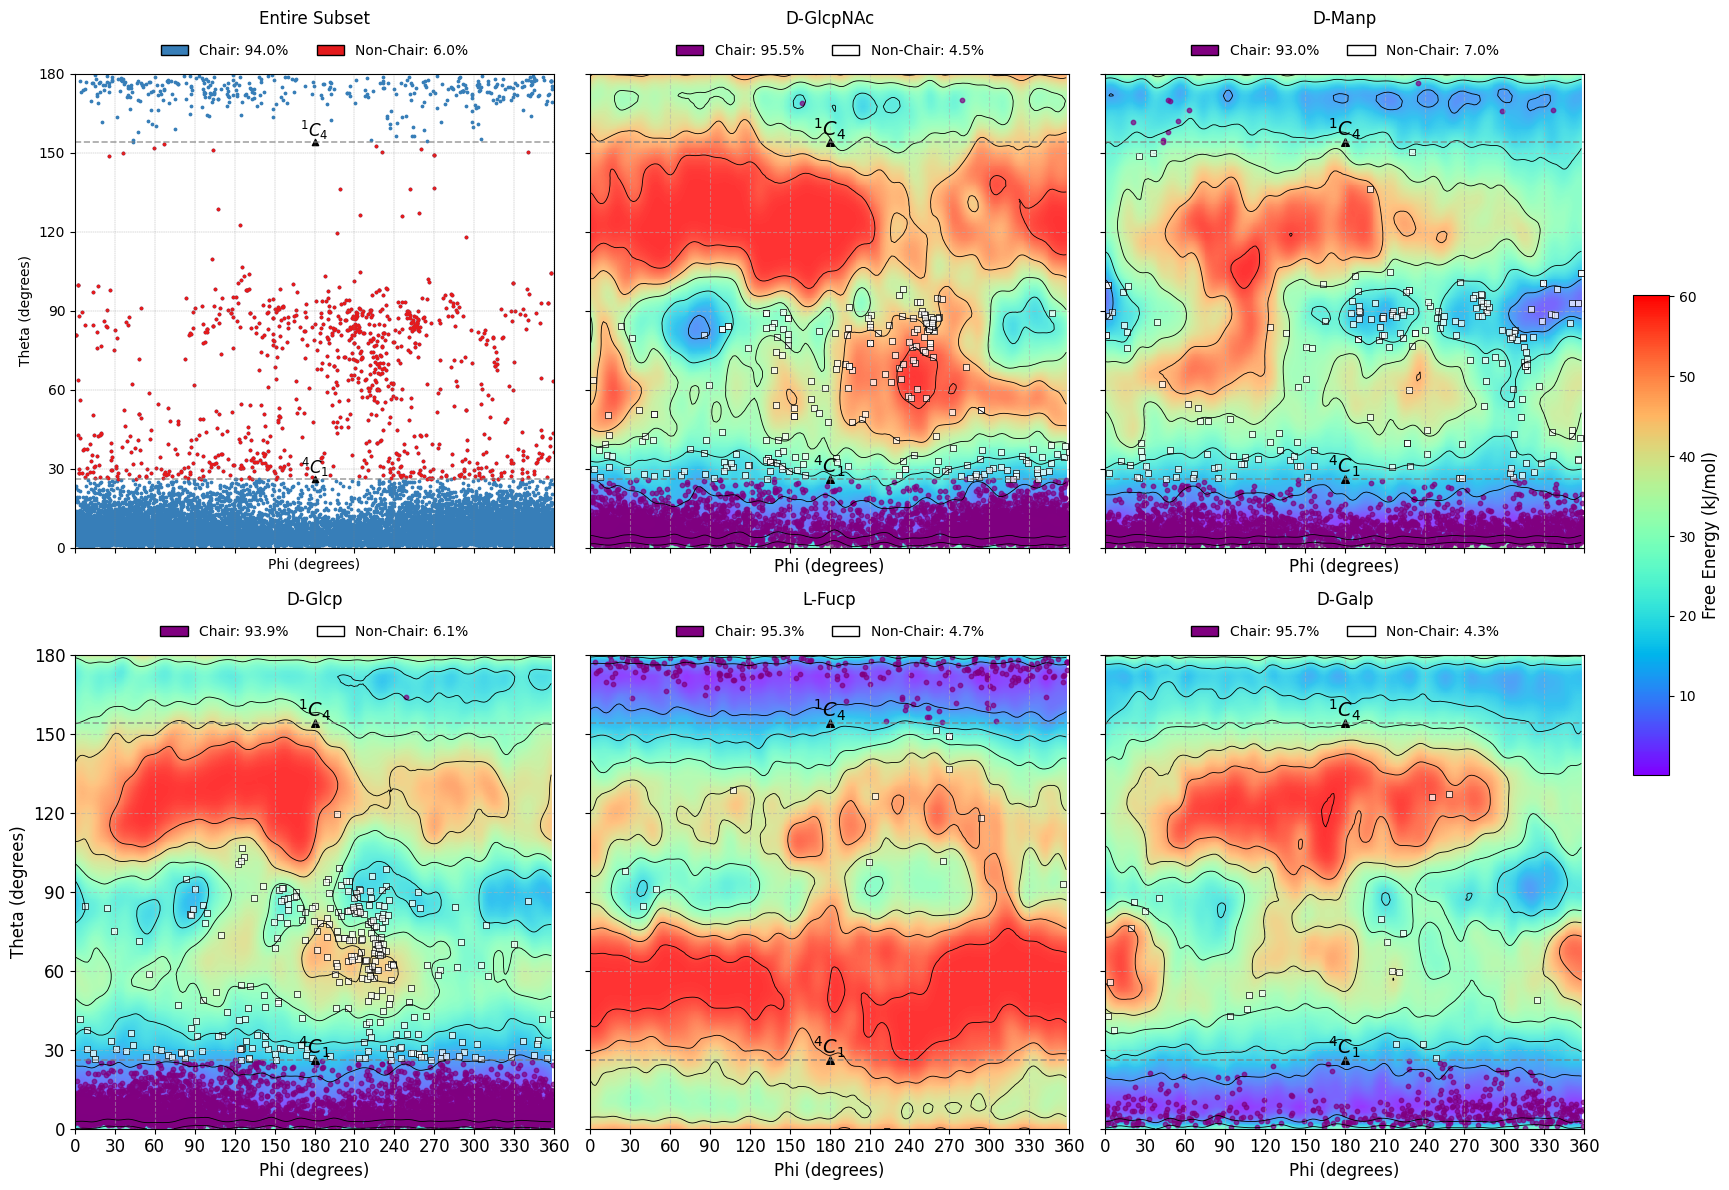

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.patches import Patch

# Mapeamento de açúcares e seus respectivos arquivos
sugars = {
    'D-GlcpNAc': {'file': 'fes-glcpnac.dat', 'filter': 'NAG|NGC'},
    'D-Manp': {'file': 'fes-mannose.dat', 'filter': 'MAN|BMA'},
    'D-Glcp': {'file': 'fes-glucose.dat', 'filter': 'GLC|BGC'},
    'L-Fucp': {'file': 'fes-fucose.dat', 'filter': 'FUC|FUL'},
    'D-Galp': {'file': 'fes-galactose.dat', 'filter': 'GAL|GLA'}    
}

data_dir = "/home/douglas/carboanalysis/carboanalysis/pdb/dinamicas/"

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

point_color = '#377eb8'  # Azul
highlight_color = '#e41a1c'  # Vermelho para Non-Chair
coordinates = [(180, 26, r"$^{4}C_{1}$"), (180, 154, r"$^{1}C_{4}$")]

# Filtragem e cálculo das condições de 'Chair' e 'Non-Chair'
highlight_condition = (piranose_df['puck.theta_graus'] > 26) & (piranose_df['puck.theta_graus'] < 154)

# Calcular as porcentagens de 'Chair' e 'Non-Chair' com base nas condições
total_points = len(piranose_df)
non_chair_points = len(piranose_df[highlight_condition])
chair_points = total_points - non_chair_points

chair_percentage = (chair_points / total_points) * 100
non_chair_percentage = (non_chair_points / total_points) * 100

# Primeiro gráfico (geral)
ax_all = axes[0]
ax_all.scatter(piranose_df['puck.phi_graus'], piranose_df['puck.theta_graus'], color=point_color, s=3)
ax_all.scatter(piranose_df.loc[highlight_condition, 'puck.phi_graus'], 
               piranose_df.loc[highlight_condition, 'puck.theta_graus'], 
               color=highlight_color, s=3)

for x, y, label in coordinates:
    ax_all.axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)
    ax_all.scatter(x, y, color='black', s=20, marker='^')
    ax_all.text(x, y, label, fontsize=12, ha='center', va='bottom', color='black')

ax_all.set_title(f'Entire Subset\n\n', fontsize=12)
legend_elements = [
    Patch(facecolor=point_color, edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
    Patch(facecolor=highlight_color, edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
]
ax_all.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.09), fontsize=10, frameon=False, ncol=2)

ax_all.set_xlim([0, 360])
ax_all.set_ylim([0, 180])
ax_all.set_xlabel('Phi (degrees)')
ax_all.set_ylabel('Theta (degrees)')
ax_all.grid(True, color='gray', linestyle='--', linewidth=0.3, alpha=0.7)
ax_all.set_xticks(range(0, 361, 30))
ax_all.set_yticks(range(0, 181, 30))

# Gráficos por açúcar
for i, (sugar_name, sugar_info) in enumerate(sugars.items()):
    file_path = data_dir + sugar_info['file']
    names = ['puck.theta', 'puck.phi', 'file.free', 'der_puck.theta', 'der_puck.phi']
    df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)

    df_dat['puck.phi_graus'] = np.degrees(df_dat['puck.phi'])
    df_dat['puck.theta_graus'] = np.degrees(df_dat['puck.theta'])
    df_dat = df_dat[['puck.phi_graus', 'puck.theta_graus', 'file.free']].dropna()

    xi = np.linspace(0, 360, 500)
    yi = np.linspace(0, 180, 500)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((df_dat['puck.phi_graus'], df_dat['puck.theta_graus']), df_dat['file.free'], (xi, yi), method='linear')

    cmap = plt.cm.rainbow
    ax = axes[i + 1]
    ax.pcolormesh(xi, yi, zi, shading='auto', cmap=cmap, alpha=0.8)

    # Adicionar linhas de contorno sem rótulos
    contour_levels = np.arange(np.nanmin(zi), np.nanmax(zi), 10)
    ax.contour(xi, yi, zi, levels=contour_levels, colors='black', linewidths=0.6)

    sugar_filter = sugar_info['filter']
    piranose_filtered = piranose_df[piranose_df['sugar'].str.contains(sugar_filter, na=False)]

    highlight_condition = (piranose_filtered['puck.theta_graus'] > 26) & (piranose_filtered['puck.theta_graus'] < 154)

    #Chair
    ax.scatter(piranose_filtered.loc[~highlight_condition, 'puck.phi_graus'], 
               piranose_filtered.loc[~highlight_condition, 'puck.theta_graus'], 
               color='#800080', s=10, alpha=0.7)
    #Non-Chair
    ax.scatter(piranose_filtered.loc[highlight_condition, 'puck.phi_graus'], 
               piranose_filtered.loc[highlight_condition, 'puck.theta_graus'], 
               color='#FFFFFF', s=24, alpha=0.7, marker='s', edgecolors='black', linewidths=0.7)

    for x, y, label in coordinates:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)
        ax.scatter(x, y, color='black', s=30, marker='^')
        ax.text(x, y, label, fontsize=14, ha='center', va='bottom', color='black')

    # Calcular porcentagens para o gráfico atual
    total_points = len(piranose_filtered)
    non_chair_points = len(piranose_filtered[highlight_condition])
    chair_points = total_points - non_chair_points

    chair_percentage = (chair_points / total_points) * 100 if total_points > 0 else 0
    non_chair_percentage = (non_chair_points / total_points) * 100 if total_points > 0 else 0

    # Títulos dos subplots
    axes[i + 1].set_title(f'{sugar_name}\n\n', fontsize=12)

    # Adicionar a legenda personalizada
    legend_elements = [
        Patch(facecolor='#800080', edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
        Patch(facecolor='#FFFFFF', edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
    ]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.09), fontsize=10, frameon=False, ncol=2)

    ax.set_xlim([0, 360])
    ax.set_ylim([0, 180])
    ax.set_xlabel('Phi (degrees)', fontsize=12)
    if ax in [axes[0], axes[3]]:
        ax.set_ylabel('Theta (degrees)', fontsize=12)
    ax.set_xticks(range(0, 361, 30))
    ax.set_yticks(range(0, 181, 30))
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adicionar colorbar à direita, com altura de 2 colunas
cbar_ax = fig.add_axes([0.91, 0.35, 0.02, 0.4])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=np.nanmin(zi), vmax=np.nanmax(zi))  # Normalizar valores
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical')
cbar.set_label('Free Energy (kJ/mol)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajusta o layout para não sobrepor a colorbar
plt.show()

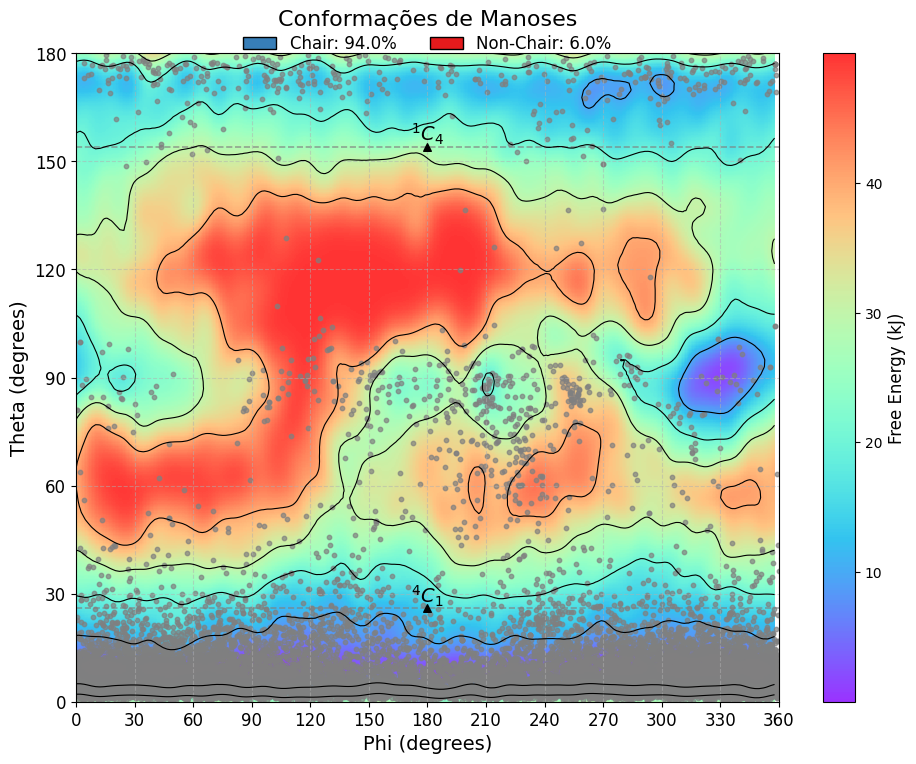

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.interpolate import griddata

# Converter colunas de manose_dat para numéricas (caso necessário)
manose_dat['puck.theta_graus'] = pd.to_numeric(manose_dat['puck.theta_graus'], errors='coerce')
manose_dat['puck.phi_graus'] = pd.to_numeric(manose_dat['puck.phi_graus'], errors='coerce')
manose_dat['file.free'] = pd.to_numeric(manose_dat['file.free'], errors='coerce')

# Remover linhas com valores inválidos
manose_dat = manose_dat.dropna(subset=['puck.theta_graus', 'puck.phi_graus', 'file.free'])

# Criar uma grade para o fundo
x = manose_dat['puck.phi_graus']
y = manose_dat['puck.theta_graus']
z = manose_dat['file.free']

# Definir os limites e criar a malha
xi = np.linspace(0, 360, 500)  # Resolução no eixo X
yi = np.linspace(0, 180, 500)  # Resolução no eixo Y
xi, yi = np.meshgrid(xi, yi)

# Interpolação para preencher os valores da grade
zi = griddata((x, y), z, (xi, yi), method='linear')

# Criar a figura
fig, ax = plt.subplots(figsize=(10, 8))

# Adicionar o fundo colorido contínuo
cmap = plt.cm.rainbow  # Escolha um colormap, pode ser 'viridis', 'coolwarm', etc.
im = ax.pcolormesh(xi, yi, zi, shading='auto', cmap=cmap, alpha=0.8)

# Adicionar a barra de cores para referência
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Free Energy (kJ)', fontsize=12)

# Adicionar os dados do gráfico principal (os pontos)
highlight_condition = (piranose_df['puck.theta_graus'] > 26) & (piranose_df['puck.theta_graus'] < 154)

# Pontos destacados (Non-Chair)
ax.scatter(
    piranose_df.loc[highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[highlight_condition, 'puck.theta_graus'], 
    color='#808080',  # Vermelho
    s=10,
    label='Non-Chair',
    alpha = 0.7
)

# Pontos padrão (Chair)
ax.scatter(
    piranose_df.loc[~highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[~highlight_condition, 'puck.theta_graus'], 
    color='#808080',  # Azul
    s=10,
    label='Chair',
    alpha = 0.7
)

# Adicionar coordenadas e rótulos
coordinates = [(180, 26, r"$^{4}C_{1}$"), (180, 154, r"$^{1}C_{4}$")]
for x, y, label in coordinates:
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7, zorder=1)
    ax.scatter(x, y, color='black', s=30, marker='^', zorder=10)
    ax.text(x, y, label, fontsize=14, ha='center', va='bottom', color='black', zorder=10)

# Configurações do gráfico
ax.set_xlim([0, 360])
ax.set_ylim([0, 180])
ax.set_xlabel('Phi (degrees)', fontsize=14)
ax.set_ylabel('Theta (degrees)', fontsize=14)
ax.set_title('Conformações de Manoses', fontsize=16, pad=20)
ax.set_xticks(range(0, 361, 30))
ax.set_yticks(range(0, 181, 30))
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Adicionar a legenda
chair_percentage = len(piranose_df.loc[~highlight_condition]) / len(piranose_df) * 100
non_chair_percentage = len(piranose_df.loc[highlight_condition]) / len(piranose_df) * 100
legend_elements = [
    Patch(facecolor='#377eb8', edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
    Patch(facecolor='#e41a1c', edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.052),
    fontsize=12,
    frameon=False,
    ncol=2
)
# Definir os níveis de contorno a cada 10 kJ
contour_levels = np.arange(np.nanmin(zi), np.nanmax(zi), 10)

# Adicionar as linhas de contorno (sem rótulos)
ax.contour(xi, yi, zi, levels=contour_levels, colors='black', linewidths=0.8)
plt.tight_layout(pad=2.0)
plt.show()


/tmp/ipykernel_137172/3774713816.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)
/tmp/ipykernel_137172/3774713816.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)
/tmp/ipykernel_137172/3774713816.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)
/tmp/ipykernel_137172/3774713816.py:67: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s

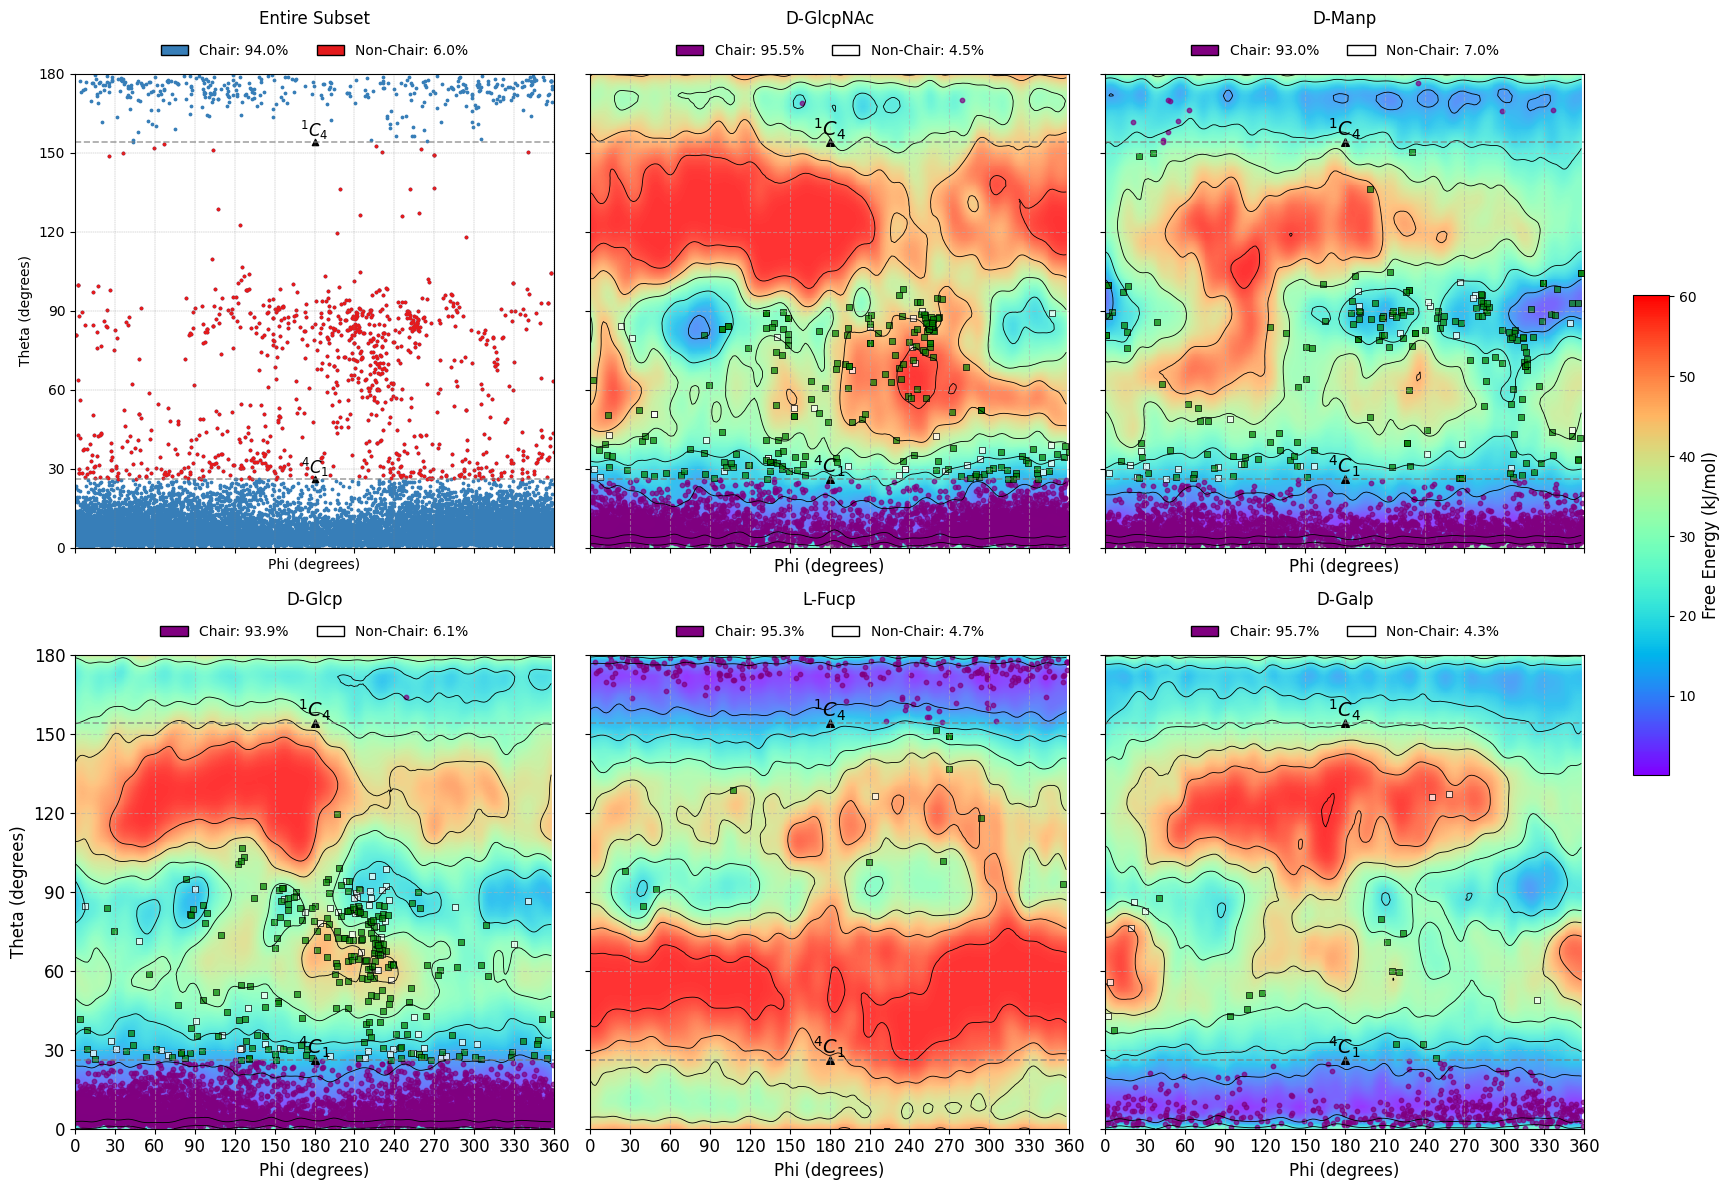

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.patches import Patch

# Mapeamento de açúcares e seus respectivos arquivos
sugars = {
    'D-GlcpNAc': {'file': 'fes-glcpnac.dat', 'filter': 'NAG|NGC'},
    'D-Manp': {'file': 'fes-mannose.dat', 'filter': 'MAN|BMA'},
    'D-Glcp': {'file': 'fes-glucose.dat', 'filter': 'GLC|BGC'},
    'L-Fucp': {'file': 'fes-fucose.dat', 'filter': 'FUC|FUL'},
    'D-Galp': {'file': 'fes-galactose.dat', 'filter': 'GAL|GLA'}    
}

data_dir = "/home/douglas/carboanalysis/carboanalysis/pdb/dinamicas/"

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

point_color = '#377eb8'  # Azul
highlight_color = '#e41a1c'  # Vermelho para Non-Chair
coordinates = [(180, 26, r"$^{4}C_{1}$"), (180, 154, r"$^{1}C_{4}$")]

# Filtragem e cálculo das condições de 'Chair' e 'Non-Chair'
highlight_condition = (piranose_df['puck.theta_graus'] > 26) & (piranose_df['puck.theta_graus'] < 154)

# Calcular as porcentagens de 'Chair' e 'Non-Chair' com base nas condições
total_points = len(piranose_df)
non_chair_points = len(piranose_df[highlight_condition])
chair_points = total_points - non_chair_points

chair_percentage = (chair_points / total_points) * 100
non_chair_percentage = (non_chair_points / total_points) * 100

# Primeiro gráfico (geral)
ax_all = axes[0]
ax_all.scatter(piranose_df['puck.phi_graus'], piranose_df['puck.theta_graus'], color=point_color, s=3)
ax_all.scatter(piranose_df.loc[highlight_condition, 'puck.phi_graus'], 
               piranose_df.loc[highlight_condition, 'puck.theta_graus'], 
               color=highlight_color, s=3)

for x, y, label in coordinates:
    ax_all.axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)
    ax_all.scatter(x, y, color='black', s=20, marker='^')
    ax_all.text(x, y, label, fontsize=12, ha='center', va='bottom', color='black')

ax_all.set_title(f'Entire Subset\n\n', fontsize=12)
legend_elements = [
    Patch(facecolor=point_color, edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
    Patch(facecolor=highlight_color, edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
]
ax_all.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.09), fontsize=10, frameon=False, ncol=2)

ax_all.set_xlim([0, 360])
ax_all.set_ylim([0, 180])
ax_all.set_xlabel('Phi (degrees)')
ax_all.set_ylabel('Theta (degrees)')
ax_all.grid(True, color='gray', linestyle='--', linewidth=0.3, alpha=0.7)
ax_all.set_xticks(range(0, 361, 30))
ax_all.set_yticks(range(0, 181, 30))

# Gráficos por açúcar
for i, (sugar_name, sugar_info) in enumerate(sugars.items()):
    file_path = data_dir + sugar_info['file']
    names = ['puck.theta', 'puck.phi', 'file.free', 'der_puck.theta', 'der_puck.phi']
    df_dat = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=9, names=names)

    df_dat['puck.phi_graus'] = np.degrees(df_dat['puck.phi'])
    df_dat['puck.theta_graus'] = np.degrees(df_dat['puck.theta'])
    df_dat = df_dat[['puck.phi_graus', 'puck.theta_graus', 'file.free']].dropna()

    xi = np.linspace(0, 360, 500)
    yi = np.linspace(0, 180, 500)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((df_dat['puck.phi_graus'], df_dat['puck.theta_graus']), df_dat['file.free'], (xi, yi), method='linear')

    cmap = plt.cm.rainbow
    ax = axes[i + 1]
    ax.pcolormesh(xi, yi, zi, shading='auto', cmap=cmap, alpha=0.8)

    # Adicionar linhas de contorno sem rótulos
    contour_levels = np.arange(np.nanmin(zi), np.nanmax(zi), 10)
    ax.contour(xi, yi, zi, levels=contour_levels, colors='black', linewidths=0.6)

    sugar_filter = sugar_info['filter']
    piranose_filtered = piranose_df[piranose_df['sugar'].str.contains(sugar_filter, na=False)]

    highlight_condition = (piranose_filtered['puck.theta_graus'] > 26) & (piranose_filtered['puck.theta_graus'] < 154)

    #Chair
    ax.scatter(piranose_filtered.loc[~highlight_condition, 'puck.phi_graus'], 
               piranose_filtered.loc[~highlight_condition, 'puck.theta_graus'], 
               color='#800080', s=10, alpha=0.7)
    #Non-Chair
    non_chair_df = piranose_filtered[highlight_condition]

    # Separar com ou sem GH na coluna 'Family'
    gh_condition = non_chair_df['Family'].str.contains('GH', na=False)
    non_gh_df = non_chair_df[~gh_condition]
    gh_df = non_chair_df[gh_condition]

    # Pontos sem GH - branco
    ax.scatter(non_gh_df['puck.phi_graus'], 
            non_gh_df['puck.theta_graus'], 
            color='#FFFFFF', s=24, alpha=0.7, marker='s', edgecolors='black', linewidths=0.7)

    # Pontos com GH - verde
    ax.scatter(gh_df['puck.phi_graus'], 
            gh_df['puck.theta_graus'], 
            color='green', s=24, alpha=0.7, marker='s', edgecolors='black', linewidths=0.7)

    for x, y, label in coordinates:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)
        ax.scatter(x, y, color='black', s=30, marker='^'    # Separar com ou sem GH na coluna 'Family'
    gh_condition = non_chair_df['Family'].str.contains('GH', na=False)
    non_gh_df = non_chair_df[~gh_condition]
    gh_df = non_chair_df[gh_condition]

    # Pontos sem GH - branco
    ax.scatter(non_gh_df['puck.phi_graus'], 
            non_gh_df['puck.theta_graus'], 
            color='#FFFFFF', s=24, alpha=0.7, marker='s', edgecolors='black', linewidths=0.7)

    # Pontos com GH - verde
    ax.scatter(gh_df['puck.phi_graus'], 
            gh_df['puck.theta_graus'], 
            color='green', s=24, alpha=0.7, marker='s', edgecolors='black', linewidths=0.7)
    total_points = len(piranose_filtered)
    non_chair_points = len(piranose_filtered[highlight_condition])
    chair_points = total_points - non_chair_points

    chair_percentage = (chair_points / total_points) * 100 if total_points > 0 else 0
    non_chair_percentage = (non_chair_points / total_points) * 100 if total_points > 0 else 0

    # Títulos dos subplots
    axes[i + 1].set_title(f'{sugar_name}\n\n', fontsize=12)

    # Adicionar a legenda personalizada
    legend_elements = [
        Patch(facecolor='#800080', edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
        Patch(facecolor='#FFFFFF', edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
    ]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.09), fontsize=10, frameon=False, ncol=2)

    ax.set_xlim([0, 360])
    ax.set_ylim([0, 180])
    ax.set_xlabel('Phi (degrees)', fontsize=12)
    if ax in [axes[0], axes[3]]:
        ax.set_ylabel('Theta (degrees)', fontsize=12)
    ax.set_xticks(range(0, 361, 30))
    ax.set_yticks(range(0, 181, 30))
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adicionar colorbar à direita, com altura de 2 colunas
cbar_ax = fig.add_axes([0.91, 0.35, 0.02, 0.4])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=np.nanmin(zi), vmax=np.nanmax(zi))  # Normalizar valores
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical')
cbar.set_label('Free Energy (kJ/mol)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajusta o layout para não sobrepor a colorbar
plt.show()